# Aula 9: Aplicações de Redes Neurais Convolucionais (CNNs) em Reconhecimento de Imagem

## Objetivos da Aula
Focaremos em como as Redes Neurais Convolucionais (CNNs) são aplicadas no campo do reconhecimento de imagem. Exploraremos os princípios por trás do uso das CNNs para identificar características faciais distintas sob diversas condições de iluminação e ângulos.

## 1: Aplicações em Reconhecimento de Imagem

### 1.1: Reconhecimento Facial

#### Definição e Uso
O reconhecimento facial é uma das aplicações mais populares e úteis de redes neurais convolucionais. As CNNs são treinadas para identificar e diferenciar características faciais únicas que distinguem um indivíduo de outro. Esta capacidade de reconhecimento é robusta sob variadas condições de iluminação e diferentes ângulos de visualização, o que é fundamental para aplicações em ambientes reais onde tais condições podem variar significativamente.

- **Como Funciona**: As CNNs processam imagens faciais através de múltiplas camadas de filtragem para detectar e aprender características faciais específicas como bordas, formas e texturas. Cada camada da rede se concentra em características cada vez mais complexas, culminando na habilidade de reconhecer um rosto completo.

#### Casos de Uso Prático
O reconhecimento facial baseado em CNN tem uma vasta gama de aplicações práticas que melhoram a segurança e a conveniência em muitos aspectos de nossas vidas.

- **Sistemas de Segurança**: Instalações comerciais e residenciais utilizam essa tecnologia para controlar o acesso e monitorar atividades suspeitas, identificando pessoas contra bases de dados conhecidas.
- **Desbloqueio de Smartphones**: Uma das aplicações mais comuns do reconhecimento facial é no desbloqueio de dispositivos móveis, onde a CNN permite uma verificação segura e rápida da identidade do usuário.
- **Identificação em Eventos**: Grandes eventos, como conferências e concertos, podem utilizar o reconhecimento facial para a gestão de acessos e para melhorar a segurança ao verificar rapidamente a identidade dos participantes.

#### Importância Estratégica
O desenvolvimento e a implementação de tecnologias de reconhecimento facial têm implicações significativas para a privacidade e a ética. É crucial que discussões sobre regulamentações e limites éticos acompanhem o avanço dessas tecnologias para assegurar que seu uso seja responsável e respeite os direitos individuais.

- **Considerações Éticas**: O uso de reconhecimento facial levanta questões sobre privacidade e consentimento, exigindo políticas claras que regulem seu uso.
- **Desafios Técnicos**: Além das implicações éticas, o reconhecimento facial também enfrenta desafios técnicos como a necessidade de precisão sob diversas condições e o risco de viés em seus algoritmos.

Esta parte da aula visa não apenas entender como as CNNs são aplicadas ao reconhecimento facial, mas também refletir sobre as responsabilidades sociais e éticas que acompanham esta poderosa ferramenta tecnológica.


In [1]:
import os
import pandas as pd
import itertools
import random

# Caminho base para as imagens
base_path = 'dados/imagens/'

# Lista de pastas que contêm mais de uma imagem
mais_1_imagem = [f'{base_path}{x}' for x in os.listdir(base_path) if len(os.listdir(f'{base_path}{x}')) > 1]

In [2]:
# Exibe o total de pastas
len(os.listdir(base_path))

5749

In [3]:
# Exibe o total de pastas com mais de 1 imagem
len(mais_1_imagem)

1680

In [4]:
# Lista para armazenar os dados
data = []

# Processa cada pasta para pares da mesma pessoa (classe 1)
for folder in mais_1_imagem:
    files = os.listdir(folder)
    for (img1, img2) in itertools.combinations(files, 2):
        path_img1 = os.path.join(folder, img1)
        path_img2 = os.path.join(folder, img2)
        data.append([path_img1, path_img2, 1])  # mesma pessoa

In [5]:
# Processa para pares de pessoas diferentes (classe 0)
# Para cada pasta, escolhe uma imagem e combina com uma imagem de uma pasta diferente
cont = 0
total = len(data)
for current_folder in mais_1_imagem:
    other_folders = [f for f in mais_1_imagem if f != current_folder]
    current_files = os.listdir(current_folder)
    if not current_files or not other_folders:
        continue
    for other_folder in other_folders:
        other_files = os.listdir(other_folder)
        if not other_files:
            continue
        # Escolhe uma imagem aleatória de cada pasta
        img1 = random.choice(current_files)
        img2 = random.choice(other_files)
        path_img1 = os.path.join(current_folder, img1)
        path_img2 = os.path.join(other_folder, img2)
        data.append([path_img1, path_img2, 0])  # pessoas diferentes
        cont += 1
        if cont >= total:
            break
# Cria um DataFrame do pandas
df = pd.DataFrame(data, columns=['rota_imagem_1', 'rota_imagem_2', 'classe'])

# Embaralha o DataFrame para misturar os pares de classes
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df_reduzido = pd.concat([df[df['classe'] == 1][:200], df[df['classe'] == 0][:200]])
df_reduzido = df_reduzido.sample(frac=1).reset_index(drop=True)

In [7]:
df_reduzido

,rota_imagem_1,rota_imagem_2,classe
0,dados/imagens/Scott_Wolf/Scott_Wolf_0002.jpg,dados/imagens/Raymond_Odierno/Raymond_Odierno_...,0
1,dados/imagens/Hugo_Chavez/Hugo_Chavez_0013.jpg,dados/imagens/Hugo_Chavez/Hugo_Chavez_0070.jpg,1
2,dados/imagens/George_W_Bush/George_W_Bush_0149...,dados/imagens/George_W_Bush/George_W_Bush_0282...,1
3,dados/imagens/George_W_Bush/George_W_Bush_0145...,dados/imagens/George_W_Bush/George_W_Bush_0511...,1
4,dados/imagens/Heath_Ledger/Heath_Ledger_0001.jpg,dados/imagens/Mack_Brown/Mack_Brown_0002.jpg,0
...,...,...,...
395,dados/imagens/Shannon_OBrien/Shannon_OBrien_00...,dados/imagens/Bill_Callahan/Bill_Callahan_0001...,0
396,dados/imagens/Herta_Daeubler-Gmelin/Herta_Daeu...,dados/imagens/JJ_Redick/JJ_Redick_0001.jpg,0
397,dados/imagens/Hillary_Clinton/Hillary_Clinton_...,dados/imagens/Jeb_Bush/Jeb_Bush_0004.jpg,0
398,dados/imagens/Kate_Winslet/Kate_Winslet_0004.jpg,dados/imagens/Gro_Harlem_Brundtland/Gro_Harlem...,0


In [8]:
df_reduzido.classe.value_counts()

classe
0    200
1    200
Name: count, dtype: int64

In [9]:
#sudo apt-get update
#sudo apt-get install cmake
#sudo apt-get install build-essential
#sudo apt-get install python3-dev
#sudo apt-get install libx11-dev
#sudo apt-get install libgtk-3-dev
#sudo apt-get install libopenblas-dev
#pip install dlib
#pip install face_recognition Pillow

In [10]:
import face_recognition
from PIL import Image
from IPython.display import clear_output

In [11]:
def compare_faces(file1, file2):
    # Carrega as imagens para o sistema
    image1 = face_recognition.load_image_file(file1)
    image2 = face_recognition.load_image_file(file2)

    # Detecta as faces nas imagens
    face1_encoding = face_recognition.face_encodings(image1)
    face2_encoding = face_recognition.face_encodings(image2)

    # Verifica se encontrou alguma face nas imagens
    if not face1_encoding or not face2_encoding:
        print("Não foi possível encontrar uma face em uma das imagens.")
        return 0

    # Supõe que cada imagem contém apenas uma face
    # Compara as primeiras faces encontradas nas duas imagens
    results = face_recognition.compare_faces([face1_encoding[0]], face2_encoding[0])
    return 1 if results[0] else 0

In [12]:
img_1, img_2 = df_reduzido.iloc[0][['rota_imagem_1','rota_imagem_2']]
resultado = compare_faces(img_1, img_2)
resultado

0

In [13]:
# Inicializa uma lista vazia para armazenar os resultados das previsões
previsao = []

# Loop através de cada linha do DataFrame 'df_reduzido'
for cont in range(len(df_reduzido)):
    # Extrai as rotas (caminhos dos arquivos) para as duas imagens da linha atual
    img_1, img_2 = df_reduzido.iloc[cont][['rota_imagem_1','rota_imagem_2']]
    
    # Chama a função 'compare_faces' que compara as duas imagens
    resultado = compare_faces(img_1, img_2)
    
    # Adiciona o resultado da comparação à lista 'previsao'
    previsao.append(resultado)
    
    # Limpa a saída do display para evitar desordem no console/jupyter notebook
    clear_output()
    
    # Imprime o progresso atual do loop como uma porcentagem
    print(round(cont/len(df_reduzido) * 100, 2), '%')
    
# Adiciona a coluna 'previsao' ao DataFrame 'df_reduzido', contendo os resultados das comparações
df_reduzido['previsao'] = previsao

99.75 %


In [14]:
df_reduzido

,rota_imagem_1,rota_imagem_2,classe,previsao
0,dados/imagens/Scott_Wolf/Scott_Wolf_0002.jpg,dados/imagens/Raymond_Odierno/Raymond_Odierno_...,0,0
1,dados/imagens/Hugo_Chavez/Hugo_Chavez_0013.jpg,dados/imagens/Hugo_Chavez/Hugo_Chavez_0070.jpg,1,1
2,dados/imagens/George_W_Bush/George_W_Bush_0149...,dados/imagens/George_W_Bush/George_W_Bush_0282...,1,1
3,dados/imagens/George_W_Bush/George_W_Bush_0145...,dados/imagens/George_W_Bush/George_W_Bush_0511...,1,1
4,dados/imagens/Heath_Ledger/Heath_Ledger_0001.jpg,dados/imagens/Mack_Brown/Mack_Brown_0002.jpg,0,0
...,...,...,...,...
395,dados/imagens/Shannon_OBrien/Shannon_OBrien_00...,dados/imagens/Bill_Callahan/Bill_Callahan_0001...,0,0
396,dados/imagens/Herta_Daeubler-Gmelin/Herta_Daeu...,dados/imagens/JJ_Redick/JJ_Redick_0001.jpg,0,0
397,dados/imagens/Hillary_Clinton/Hillary_Clinton_...,dados/imagens/Jeb_Bush/Jeb_Bush_0004.jpg,0,0
398,dados/imagens/Kate_Winslet/Kate_Winslet_0004.jpg,dados/imagens/Gro_Harlem_Brundtland/Gro_Harlem...,0,0


In [15]:
df_reduzido.previsao.value_counts()

previsao
0    202
1    198
Name: count, dtype: int64

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Calculando métricas de classificação binária
report = classification_report(df_reduzido['classe'], df_reduzido['previsao'])
accuracy = accuracy_score(df_reduzido['classe'], df_reduzido['previsao'])

# Imprimindo o relatório de classificação e a acurácia
print("Relatório de Classificação:\n", report)
print("Acurácia:", accuracy)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(df_reduzido['classe'], df_reduzido['previsao'])
conf_matrix


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       200
           1       1.00      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

Acurácia: 0.995


array([[200,   0],
       [  2, 198]])

### 1.2: Classificação de Imagens

#### Funcionalidade
A classificação de imagens envolve o uso de CNNs para identificar e categorizar imagens dentro de um conjunto definido de categorias com base em seu conteúdo visual. Este processo é fundamental para muitas aplicações que dependem de uma compreensão visual automatizada para funcionar eficientemente.

- **Como Funciona**: Através de múltiplas camadas de processamento, as CNNs aprendem a distinguir entre diferentes objetos e cenários em imagens. Começando por identificar características simples como bordas e cores em camadas inferiores, elas progridem para identificar formas e padrões mais complexos nas camadas superiores. O resultado é uma capacidade de reconhecer e classificar a imagem como pertencente a uma categoria específica.

#### Exemplos de Implementação
A classificação de imagens tem uma vasta gama de implementações práticas que têm transformado muitos setores, proporcionando automação e insights que não eram possíveis anteriormente.

- **Organização Automática de Fotos em Mídias Sociais**: Plataformas de mídia social usam CNNs para categorizar e organizar automaticamente as fotos que os usuários carregam por tema, localização ou pessoas presentes, melhorando a experiência do usuário.
- **Filtros de Conteúdo Digital**: Empresas de tecnologia implementam modelos de CNN para monitorar e filtrar conteúdo visual, identificando imagens inapropriadas ou que não cumprem com as diretrizes de conteúdo automaticamente.

#### Impacto e Potencial
A eficácia com que as CNNs podem ser treinadas para classificar imagens corretamente tem implicações significativas para a automação e a inteligência artificial.

- **Benefícios Práticos**: Automatização de tarefas que anteriormente requeriam intervenção humana, como a triagem de conteúdo visual para moderação ou a organização de grandes bancos de dados de imagens.
- **Desafios**: Apesar de sua utilidade, a classificação de imagens ainda enfrenta desafios como a necessidade de grandes volumes de dados de treinamento etiquetados e o risco de viés nos dados que podem afetar a precisão da classificação.

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image

2024-04-22 22:30:02.641209: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 22:30:02.641585: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 22:30:02.644914: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 22:30:02.687277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 22:30:03.356086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [19]:
def load_images_and_labels(base_dir):
    """
    Carrega imagens e seus rótulos a partir de um diretório base, converte as imagens
    para o formato adequado e divide em conjuntos de treinamento, teste e validação.
    
    Args:
    base_dir (str): Caminho para o diretório que contém subdiretórios para cada classe.
                    Cada subdiretório contém imagens dessa classe.

    Returns:
    tuple: Quatro arrays numpy contendo dados de treino, dados de teste, rótulos de treino e rótulos de teste.
    """
    images = []  # Lista para armazenar as imagens após serem processadas.
    labels = []  # Lista para armazenar os rótulos das imagens.
    class_labels = {}  # Dicionário para mapear cada classe a um índice numérico.

    # Lê as imagens dos diretórios e atribui rótulos.
    for folder in os.listdir(base_dir):
        # Cria um índice numérico para cada classe.
        class_labels[folder] = len(class_labels)
        folder_path = os.path.join(base_dir, folder)  # Caminho para o subdiretório da classe.
        
        # Itera sobre todos os arquivos dentro do subdiretório da classe.
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)  # Caminho completo para a imagem.
            img = image.load_img(img_path, target_size=(150, 150))  # Carrega a imagem e redimensiona para 150x150.
            img_array = image.img_to_array(img)  # Converte a imagem para um array numpy.
            images.append(img_array)  # Adiciona o array da imagem à lista de imagens.
            labels.append(class_labels[folder])  # Adiciona o índice da classe à lista de rótulos.

    # Converte as listas de imagens e rótulos para arrays numpy.
    images = np.array(images)
    labels = to_categorical(np.array(labels))  # Converte os rótulos para formato one-hot.

    # Divide os dados em conjuntos de treinamento (70%) e teste (30%) com a função train_test_split.
    return train_test_split(images, labels, test_size=0.3, random_state=42)


In [20]:
# Definindo o diretório base que contém as pastas de classes
base_dir = 'dados/animais'

X_train, X_test, y_train, y_test = load_images_and_labels(base_dir)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Normalizando os dados
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inicializando o modelo sequencial
model = Sequential([
    # Adicionando uma camada convolucional:
    # 32 é o número de filtros (kernels) que a camada vai usar para extrair características.
    # (3, 3) é o tamanho de cada filtro (3x3 pixels).
    # 'activation='relu'' especifica que a função de ativação ReLU será usada para adicionar não-linearidade ao modelo.
    # 'input_shape=(150, 150, 3)' define o formato da imagem de entrada como 150x150 pixels com 3 canais de cor (RGB).
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    
    # Adicionando uma camada de Max Pooling para reduzir a dimensionalidade espacial da saída da camada anterior,
    # ajudando a prevenir overfitting e reduzindo o número de parâmetros.
    # (2, 2) é o tamanho da janela de pooling para reduzir a amostra da entrada.
    MaxPooling2D(2, 2),
    
    # Segunda camada convolucional com mais filtros para capturar mais características.
    # Aumentar o número de filtros em camadas mais profundas é uma prática comum para capturar a complexidade.
    Conv2D(64, (3, 3), activation='relu'),
    
    # Segunda camada de Max Pooling.
    MaxPooling2D(2, 2),
    
    # Terceira camada convolucional com ainda mais filtros.
    Conv2D(128, (3, 3), activation='relu'),
    
    # Terceira camada de Max Pooling.
    MaxPooling2D(2, 2),
    
    # Camada Flatten para converter as matrizes 3D de dados em 1D,
    # permitindo que os dados sejam processados por camadas densas padrão.
    Flatten(),
    
    # Camada densa (fully connected) com muitas unidades para aprender características de alto nível.
    Dense(512, activation='relu'),
    
    # Camada de Dropout para regularização, ajuda a prevenir o overfitting.
    # '0.5' significa que metade das entradas será zerada aleatoriamente em cada atualização durante o treinamento.
    Dropout(0.5),
    
    # Camada de saída com um número de unidades igual ao número de classes (determinado pelo tamanho de 'y_train[0]').
    # 'activation='softmax'' é usada para a classificação multiclasse, retorna probabilidades das classes.
    Dense(len(y_train[0]), activation='softmax')
])

# Compilando o modelo:
# 'optimizer='adam'' é um método de otimização que ajusta os pesos da rede de forma eficiente.
# 'loss='categorical_crossentropy'' é a função de perda usada para problemas de classificação multiclasse.
# 'metrics=['accuracy']' indica que a acurácia do modelo será avaliada durante o treinamento e testes.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/arthur/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 402ms/step - accuracy: 0.0772 - loss: 2.8957 - val_accuracy: 0.1691 - val_loss: 2.4742
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 400ms/step - accuracy: 0.2526 - loss: 2.3469 - val_accuracy: 0.2574 - val_loss: 2.2877
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 395ms/step - accuracy: 0.3744 - loss: 2.0152 - val_accuracy: 0.4044 - val_loss: 1.9872
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 439ms/step - accuracy: 0.5056 - loss: 1.6126 - val_accuracy: 0.4926 - val_loss: 1.8143
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 423ms/step - accuracy: 0.6750 - loss: 1.1009 - val_accuracy: 0.5515 - val_loss: 1.5942
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 433ms/step - accuracy: 0.7891 - loss: 0.7465 - val_accuracy: 0.6176 - val_loss: 1.7020
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 437ms/step - accuracy: 0.8626 - loss: 0.4900 - val_accuracy: 0.6397 - val_loss: 1.7188
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - accuracy: 0.9054 - loss: 0.3454 - val_accu

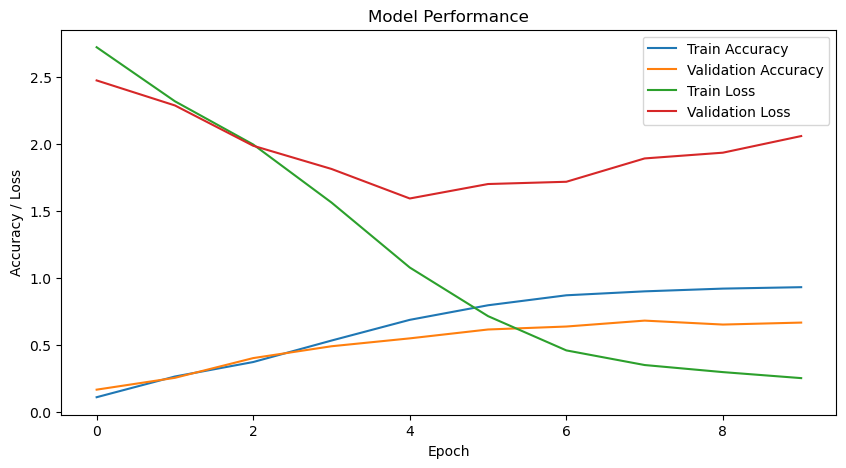

In [23]:
# Avaliação do modelo e plotagem
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Performance')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [24]:
# Métricas de classificação
predictions = np.argmax(model.predict(X_test), axis=1)
true_classes = np.argmax(y_test, axis=1)
print(classification_report(true_classes, predictions))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.69      0.76      0.72        38
           2       0.75      0.55      0.63        44
           3       0.41      0.79      0.54        39
           4       0.67      0.73      0.70        48
           5       0.71      0.50      0.59        30
           6       0.83      0.97      0.89        35
           7       0.88      0.57      0.70        40
           8       0.72      0.66      0.69        32
           9       0.82      0.46      0.59        39
          10       0.74      0.55      0.63        42
          11       0.70      0.57      0.63        37
          12       0.75      0.85      0.80        48
          13       0.49      0.88      0.63        33
          14       0.85      0.87      0.86        46

    accuracy                           0.69       584
   macro avg       0.72      0.68      0

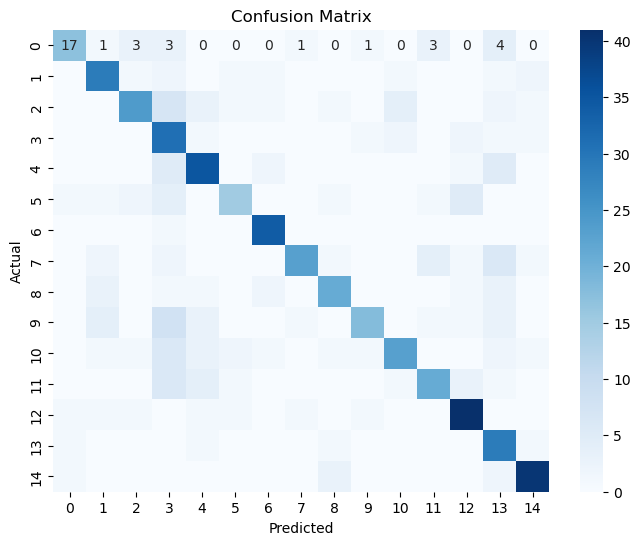

array([[17,  1,  3,  3,  0,  0,  0,  1,  0,  1,  0,  3,  0,  4,  0],
       [ 0, 29,  1,  2,  0,  1,  1,  0,  0,  0,  1,  0,  0,  1,  2],
       [ 0,  0, 24,  7,  3,  1,  1,  0,  1,  0,  4,  0,  0,  2,  1],
       [ 0,  0,  0, 31,  1,  0,  0,  0,  0,  1,  2,  0,  2,  1,  1],
       [ 0,  0,  0,  5, 35,  0,  2,  0,  0,  0,  0,  0,  1,  5,  0],
       [ 1,  1,  2,  4,  0, 15,  0,  0,  1,  0,  0,  1,  5,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0, 23,  1,  0,  0,  4,  1,  6,  1],
       [ 0,  3,  0,  1,  1,  0,  2,  0, 21,  0,  0,  0,  1,  3,  0],
       [ 0,  4,  0,  8,  3,  0,  0,  1,  0, 18,  0,  1,  1,  3,  0],
       [ 0,  1,  1,  6,  3,  2,  1,  0,  1,  1, 23,  0,  0,  2,  1],
       [ 0,  0,  0,  6,  4,  1,  0,  0,  0,  0,  1, 21,  3,  1,  0],
       [ 1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0, 41,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0, 29,  1],
       [ 1,  0,  0,  0,  0,  0,  0

In [25]:
# Matriz de confusão
cm = confusion_matrix(true_classes, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
cm

### 1.3: Detecção de Objetos

#### Mecanismo de Ação
A detecção de objetos é um processo pelo qual uma CNN não só reconhece a presença de objetos dentro de uma imagem mas também localiza precisamente esses objetos, identificando suas bordas. Este é um avanço significativo em relação à simples classificação de imagens, pois permite uma interação mais complexa e funcional com o ambiente visual.

- **Processo Técnico**: As CNNs utilizadas para detecção de objetos são geralmente treinadas para reconhecer arranjos específicos de características que formam objetos. Após a detecção das características, a rede é capaz de prever a localização do objeto na imagem, geralmente indicada por um "bounding box".

#### Aplicabilidade
A capacidade de detectar e localizar objetos em imagens tem vastas aplicações em muitos setores industriais e tecnológicos, facilitando uma variedade de tarefas automatizadas e melhorando a segurança e eficiência.

- **Automação Industrial**: Em fábricas e linhas de montagem, as CNNs podem identificar peças defeituosas, monitorar a progressão dos objetos através de uma linha de montagem e realizar controle de qualidade visual.
- **Veículos Autônomos**: Um dos usos mais críticos da detecção de objetos é em sistemas de condução autônoma, onde a capacidade de identificar e localizar precisamente outros veículos, pedestres, sinais de trânsito, e obstáculos é fundamental para a segurança.
- **Monitoramento de Vídeo**: A detecção de objetos é também amplamente utilizada em sistemas de segurança para monitorar áreas públicas ou privadas, detectando atividades suspeitas e rastreando movimentos de pessoas ou objetos importantes.

#### Desafios e Considerações
Enquanto a detecção de objetos oferece muitas oportunidades para a melhoria de processos e produtos, ela também vem com desafios específicos que precisam ser gerenciados para maximizar sua eficácia.

- **Desafios de Performance**: A precisão da detecção de objetos pode ser afetada por vários fatores, incluindo a qualidade da imagem, condições de iluminação e obstruções visuais.
- **Considerações Éticas**: Como com muitas tecnologias de vigilância, a detecção de objetos levanta questões importantes sobre privacidade e a ética do monitoramento constante.

## 2: Aplicações em Visão Computacional

### 2.1: Análise de Vídeo em Tempo Real

#### Tecnologia Envolvida
A análise de vídeo em tempo real é uma das aplicações mais exigentes e tecnologicamente avançadas das redes neurais convolucionais. As CNNs são ideais para esta tarefa devido à sua habilidade em processar e interpretar grandes volumes de dados visuais rapidamente e com alta precisão.

- **Processamento de Vídeo**: Utilizando diversas camadas de filtragem e reconhecimento de padrões, as CNNs podem detectar e interpretar atividades, movimentos e interações em vídeos, tudo em tempo real. Esta capacidade é crucial para aplicações que requerem respostas imediatas baseadas em informações visuais.

#### Utilização Prática
As implicações práticas da análise de vídeo em tempo real são vastas e impactam diretamente a segurança e a qualidade de vida nas áreas urbanas, além de melhorar significativamente a análise esportiva.

- **Monitoramento de Segurança Urbana**:
  - As CNNs são usadas para monitorar espaços públicos, detectando comportamentos suspeitos ou perigosos e alertando as autoridades instantaneamente.
  - Exemplos incluem a detecção de aglomerações que podem indicar uma emergência ou a identificação de indivíduos em listas de observação.
  
- **Análise de Desempenho Esportivo**:
  - No esporte, estas redes ajudam na análise de movimentos dos atletas, proporcionando feedback instantâneo que pode ser usado para melhorar o desempenho ou a estratégia durante uma partida ou treinamento.
  - A tecnologia permite uma análise detalhada das ações dos jogadores, ajudando técnicos e jogadores a refinar técnicas e táticas em tempo real.

#### Desafios e Avanços
A aplicação de CNNs em análise de vídeo em tempo real não está livre de desafios, no entanto, os avanços continuam a superar essas barreiras, melhorando constantemente a eficácia e eficiência da tecnologia.

- **Desafios Técnicos**:
  - Lidar com a vasta quantidade de dados em tempo real exige uma infraestrutura computacional robusta e eficiente.
  - A qualidade do vídeo pode significativamente impactar a precisão do reconhecimento e análise.
  
- **Inovações Tecnológicas**:
  - Desenvolvimentos em hardware, como GPUs mais poderosas e especializadas, continuam a diminuir as barreiras de processamento.
  - Algoritmos mais avançados de compressão e processamento de vídeo ajudam a gerenciar melhor os recursos necessários para análise em tempo real.

Este tópico não só aumenta nossa compreensão das capacidades das CNNs mas também destaca a importância de inovações contínuas na tecnologia de visão computacional para enfrentar desafios emergentes.


### 2.2: Navegação e Mapeamento Autônomos

#### Fundamentos
Navegação e mapeamento autônomos representam áreas críticas de aplicação para redes neurais convolucionais, onde elas contribuem significativamente para a autonomia de máquinas em ambientes não estruturados.

- **Tecnologia Envolvida**: As CNNs, ao processarem dados visuais, são capazes de identificar e categorizar objetos e características do ambiente. Este reconhecimento é fundamental para que robôs e veículos possam tomar decisões informadas sobre movimento e posicionamento.

#### Casos de Uso
A capacidade de navegar e mapear autonomamente usando CNNs tem vastas aplicações práticas que estão revolucionando indústrias e serviços pelo uso de robótica avançada e veículos autônomos.

- **Robôs de Limpeza Doméstica**:
  - Utilizam CNNs para mapear a configuração da casa, identificar obstáculos e otimizar rotas de limpeza, garantindo uma cobertura eficiente do espaço.
  
- **Drones para Entrega de Produtos**:
  - Empregam tecnologias de visão computacional para navegar até locais de entrega, evitando obstáculos e otimizando rotas em tempo real para garantir entregas rápidas e seguras.

#### Impacto e Inovação
O uso de CNNs para navegação e mapeamento autônomos não apenas melhora a eficiência operacional mas também abre novos caminhos para a exploração de ambientes que seriam inacessíveis ou perigosos para humanos.

- **Eficiência e Segurança**:
  - A automatização de tarefas de navegação reduz erros humanos e aumenta a eficiência operacional.
  - Veículos autônomos equipados com visão computacional podem operar em ambientes hostis ou perigosos sem risco para humanos.

- **Desafios Tecnológicos**:
  - A navegação autônoma requer uma integração complexa de hardware e software, e as CNNs devem ser extremamente robustas e precisas para serem eficazes.
  - As condições variáveis do ambiente, como iluminação e clima, podem afetar a precisão do mapeamento e da navegação.

### 3.1: Definição de Data Augmentation

#### O que é Data Augmentation?
Data Augmentation é uma técnica crucial na aprendizagem de máquina, especialmente em tarefas de visão computacional. Esta técnica envolve a modificação de imagens do dataset de treinamento para criar uma biblioteca de imagens mais diversificada e extensa. O objetivo principal é simular diferentes condições de visualização que podem não estar presentes no dataset original, mas que o modelo pode encontrar na prática.

- **Objetivos Principais**:
  - **Aumentar a Diversidade do Dataset**: Ao modificar as imagens (por rotação, escala, iluminação, etc.), criamos variações das imagens que ajudam o modelo a aprender e reconhecer padrões sob diferentes condições.
  - **Prevenir Overfitting**: Ao treinar com um conjunto de dados mais variado, o modelo tem menos chances de aprender ruídos específicos das imagens de treinamento e, consequentemente, tem melhor performance quando exposto a novos dados.

#### Como Funciona?
Data Augmentation pode ser aplicada de várias formas, dependendo das necessidades específicas do projeto e do tipo de dados com que se está trabalhando. No contexto de CNNs e visão computacional, comummente se utiliza:

- **Rotações e Translações**: Girar as imagens em diferentes ângulos e mover a imagem horizontal ou verticalmente para simular diferentes perspectivas.
- **Escala e Corte**: Ajustar o tamanho das imagens e cortar seções das mesmas para simular diferentes distâncias e focos.
- **Alterações na Iluminação**: Modificar o brilho e o contraste para simular diferentes condições de iluminação.

### Importância da Data Augmentation
A inclusão de Data Augmentation no pipeline de treinamento de modelos de CNN é considerada uma prática padrão, pois ajuda significativamente na construção de modelos mais generalizáveis e robustos.

- **Impacto no Aprendizado de Máquina**:
  - A técnica de Data Augmentation permite que os modelos generalizem melhor a partir de um conjunto de treinamento limitado, simulando um mundo visual mais complexo e variado.
  - É especialmente útil em cenários onde a coleta de dados é difícil ou cara, pois maximiza a eficácia dos dados disponíveis.

### 3.2: Implementação de Data Augmentation

#### Procedimentos de Data Augmentation
Data Augmentation envolve uma série de técnicas que ajustam as imagens de treino para criar novas versões que ajudam o modelo a aprender a generalizar a partir de diferentes perspectivas. Essas técnicas são implementadas usando várias funções disponíveis no TensorFlow, que permitem simular uma ampla gama de variações visuais que um modelo pode encontrar no mundo real.

- **Técnicas Comuns de Data Augmentation**:
  - **Rotações**: Girar imagens por vários graus para simular a mudança de orientação do objeto visualizado.
  - **Mudanças de Escala**: Ajustar o tamanho das imagens para simular objetos sendo vistos de diferentes distâncias.
  - **Cortes**: Recortar partes das imagens para focar em certos detalhes ou para simular obstruções parciais no campo de visão.
  - **Alterações na Iluminação**: Modificar o brilho e o contraste para replicar diferentes condições de iluminação ambiental.

#### Implementação Prática no TensorFlow
Implementar Data Augmentation no TensorFlow é facilitado pelo uso de `ImageDataGenerator`, uma ferramenta que automatiza a aplicação de transformações de imagem. Este método é altamente eficiente para preparar dados antes de alimentá-los em uma rede neural.

- **Exemplos de Configuração**:
  - Configurar o `ImageDataGenerator` para incluir rotações de até 40 graus, mudanças de escala de até 20%, e ajustes de brilho.
  - Utilizar o método `flow_from_directory()` para aplicar estas transformações automaticamente às imagens carregadas de um diretório especificado.

### Importância das Técnicas de Data Augmentation
A implementação cuidadosa de Data Augmentation pode significativamente aumentar a eficácia de um modelo de CNN, especialmente em ambientes onde os dados de treino são limitados ou onde o modelo precisa operar sob uma grande variedade de condições visuais.

- **Benefícios**:
  - Aumento da diversidade de dados sem necessidade de coleta de dados adicional.
  - Melhora na generalização do modelo, reduzindo o risco de overfitting.

- **Considerações Estratégicas**:
  - É crucial escolher transformações que representem variações realistas que os objetos podem apresentar no mundo real.
  - Deve-se evitar a aplicação de transformações extremas que possam distorcer a integridade dos dados, o que poderia levar a aprendizado inadequado.


In [26]:
import os
from sklearn.model_selection import train_test_split

# Definindo o diretório base onde estão as imagens
base_dir = 'dados/animais'

# Lendo as classes e organizando os caminhos
classes = os.listdir(base_dir)
dados = {}

# Estrutura para manter os dados organizados
data_split = {'train': {}, 'validation': {}, 'test': {}}

for classe in classes:
    class_path = os.path.join(base_dir, classe)
    if os.path.isdir(class_path):  # Certifique-se de que é um diretório
        image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # Divisão dos dados em treino, validação e teste
        train_val, test_imgs = train_test_split(image_files, test_size=0.2, random_state=42)
        train_imgs, val_imgs = train_test_split(train_val, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1
        
        # Salvando os caminhos nas estruturas correspondentes
        data_split['train'][classe] = train_imgs
        data_split['validation'][classe] = val_imgs
        data_split['test'][classe] = test_imgs

In [27]:
# Função para criar um DataFrame a partir do dicionário de dados
def create_dataframe(data_dict):
    # Inicializar listas vazias para dados
    paths = []
    classes = []
    
    # Iterar através do dicionário para preencher as listas
    for cls, imgs in data_dict.items():
        for img in imgs:
            paths.append(img)
            classes.append(cls)
    
    # Criar DataFrame
    df = pd.DataFrame({
        'classe': classes,
        'rota': paths
    })
    
    return df

# Criando DataFrames para cada conjunto de dados
train_df = create_dataframe(data_split['train'])
validation_df = create_dataframe(data_split['validation'])
test_df = create_dataframe(data_split['test'])

In [28]:
train_df

,classe,rota
0,Bear,dados/animais/Bear/Bear_18.jpeg
1,Bear,dados/animais/Bear/Bear_28_2.jpg
2,Bear,dados/animais/Bear/Bear_6.jpg
3,Bear,dados/animais/Bear/Bear_18_3.jpg
4,Bear,dados/animais/Bear/Bear_16_3.jpg
...,...,...
1345,Zebra,dados/animais/Zebra/Zebra_4_3.jpg
1346,Zebra,dados/animais/Zebra/Zebra_21_4.jpg
1347,Zebra,dados/animais/Zebra/Zebra_14_2.jpg
1348,Zebra,dados/animais/Zebra/Zebra_11_2.jpg


In [29]:
validation_df

,classe,rota
0,Bear,dados/animais/Bear/Bear_15_1.jpg
1,Bear,dados/animais/Bear/Bear_6_2.jpg
2,Bear,dados/animais/Bear/Bear_26_3.jpg
3,Bear,dados/animais/Bear/Bear_10_2.jpg
4,Bear,dados/animais/Bear/Bear_6_1.jpg
...,...,...
194,Zebra,dados/animais/Zebra/Zebra_22_1.jpg
195,Zebra,dados/animais/Zebra/Zebra_21_1.jpg
196,Zebra,dados/animais/Zebra/Zebra_25.jpeg
197,Zebra,dados/animais/Zebra/Zebra_12.jpg


In [30]:
test_df

,classe,rota
0,Bear,dados/animais/Bear/Bear_14.jpeg
1,Bear,dados/animais/Bear/Bear_19_3.jpg
2,Bear,dados/animais/Bear/Bear_18_2.jpg
3,Bear,dados/animais/Bear/Bear_27.jpeg
4,Bear,dados/animais/Bear/Bear_21.jpeg
...,...,...
390,Zebra,dados/animais/Zebra/Zebra_17_3.jpg
391,Zebra,dados/animais/Zebra/Zebra_28_1.jpg
392,Zebra,dados/animais/Zebra/Zebra_3.jpeg
393,Zebra,dados/animais/Zebra/Zebra_13_2.jpg


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [32]:
def load_images(image_paths, size=(150, 150)):
    """Esta função lê imagens dos caminhos especificados e retorna como um array numpy."""
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=size)
        img_array = image.img_to_array(img)
        images.append(img_array)
    return np.array(images)


In [33]:
# Carregar imagens para cada conjunto de dados
X_train = load_images(train_df['rota'].values)
X_val = load_images(validation_df['rota'].values)
X_test = load_images(test_df['rota'].values)

# Normalização dos dados de imagem
X_train /= 255.
X_val /= 255.
X_test /= 255.

# Convertendo rótulos em categorias
y_train = pd.get_dummies(train_df['classe']).values
y_val = pd.get_dummies(validation_df['classe']).values
y_test = pd.get_dummies(test_df['classe']).values

In [34]:
# Configuração do gerador de imagens com Data Augmentation para o conjunto de treinamento.
# O Data Augmentation é usado para aumentar artificialmente o tamanho do conjunto de treinamento
# por meio da geração de imagens modificadas durante o treinamento. Isso ajuda a evitar overfitting
# e melhorar a generalização do modelo em novos dados não vistos.
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normaliza os pixels da imagem para o intervalo [0, 1], ajudando na convergência mais rápida durante o treino.
    rotation_range=40,      # Intervalo de graus para rotações aleatórias da imagem. Aqui, a imagem pode ser rotacionada em até 40 graus para a esquerda ou direita.
    width_shift_range=0.2,  # Fração da largura total (aqui 20%) para a qual a imagem pode ser horizontalmente transladada, i.e., movida para a esquerda ou direita.
    height_shift_range=0.2, # Fração da altura total (aqui 20%) para a qual a imagem pode ser verticalmente transladada, i.e., movida para cima ou para baixo.
    shear_range=0.2,        # Intensidade da distorção de cisalhamento (em graus). Permite inclinar a imagem para simular uma perspectiva de ângulo.
    zoom_range=0.2,         # Intervalo para zoom aleatório. Aqui, as imagens podem ser aumentadas ou diminuídas em até 20%.
    horizontal_flip=True,   # Permite inverter aleatoriamente as imagens horizontalmente. Isso significa refletir a imagem ao longo do eixo vertical.
    fill_mode='nearest'     # Método usado para preencher os pixels novos que podem aparecer após uma rotação ou um deslocamento de largura/altura.
                            # 'nearest' preenche com o pixel mais próximo.
)

# Configuração do gerador de imagens para os conjuntos de validação e teste.
# Aqui não aplicamos Data Augmentation; apenas realizamos a normalização das imagens.
test_val_datagen = ImageDataGenerator(
    rescale=1./255  # Normaliza os pixels da imagem para o intervalo [0, 1] como no gerador de treinamento.
)

In [35]:
# Definição de uma função para criar um gerador de dados de imagens a partir de um dataframe.
# Esta função simplifica a criação de geradores de imagens que são usados para treinar ou avaliar o modelo.
def create_datagen_flow_from_dataframe(df, datagen, target_size=(150, 150), batch_size=32, class_mode='categorical'):
    """
    Cria e retorna um gerador que será usado para ler imagens em batches diretamente do dataframe.
    
    Args:
    df (DataFrame): Dataframe contendo as rotas das imagens e suas respectivas classes.
    datagen (ImageDataGenerator): Instância do ImageDataGenerator configurada para especificar como as imagens devem ser pré-processadas.
    target_size (tuple): O tamanho para o qual as imagens serão redimensionadas. É importante que o tamanho de entrada seja consistente na rede neural.
    batch_size (int): Número de imagens a serem geradas por lote. Ajustar este número pode impactar a memória utilizada e a velocidade do treinamento.
    class_mode (str): Define o tipo de rótulo de saída que será gerado. Opções comuns incluem:
                      'categorical' - para classificação multiclasse, retorna rótulos de classe one-hot,
                      'binary' - para classificação binária, retorna rótulos binários,
                      'sparse' - para classificação multiclasse, retorna rótulos como inteiros.

    Returns:
    DirectoryIterator: Retorna um gerador que produz pares de entrada (imagem) e saída (rótulo) em batches ao treinar o modelo.
    """
    return datagen.flow_from_dataframe(
        dataframe=df,        # Dataframe de entrada que contém as informações das imagens
        x_col='rota',        # Coluna no dataframe que contém o caminho para o arquivo de imagem
        y_col='classe',      # Coluna no dataframe que contém os rótulos de classe das imagens
        target_size=target_size,  # As dimensões para as quais as imagens serão redimensionadas; importante para a entrada da CNN
        batch_size=batch_size,    # Número de imagens a serem processadas em um único lote
        class_mode=class_mode     # O tipo de dados de saída que será gerado (categórico, binário, etc.)
    )

# Criando os geradores de dados para treinamento, validação e teste utilizando a função definida acima.
# Estes geradores lerão as imagens e suas etiquetas diretamente do dataframe e aplicarão as transformações especificadas
# pelo ImageDataGenerator correspondente.

# Gerador para treinamento
train_generator = create_datagen_flow_from_dataframe(train_df, train_datagen)

# Gerador para validação
validation_generator = create_datagen_flow_from_dataframe(validation_df, test_val_datagen)

# Gerador para teste
test_generator = create_datagen_flow_from_dataframe(test_df, test_val_datagen)

Found 1350 validated image filenames belonging to 15 classes.
Found 199 validated image filenames belonging to 15 classes.
Found 395 validated image filenames belonging to 15 classes.


In [36]:
train_df

,classe,rota
0,Bear,dados/animais/Bear/Bear_18.jpeg
1,Bear,dados/animais/Bear/Bear_28_2.jpg
2,Bear,dados/animais/Bear/Bear_6.jpg
3,Bear,dados/animais/Bear/Bear_18_3.jpg
4,Bear,dados/animais/Bear/Bear_16_3.jpg
...,...,...
1345,Zebra,dados/animais/Zebra/Zebra_4_3.jpg
1346,Zebra,dados/animais/Zebra/Zebra_21_4.jpg
1347,Zebra,dados/animais/Zebra/Zebra_14_2.jpg
1348,Zebra,dados/animais/Zebra/Zebra_11_2.jpg


In [37]:
# Modelo CNN: Construção do modelo usando o Keras Sequential API, que permite a criação de modelos camada por camada para classificação de imagens.
model = Sequential([
    # Primeira camada convolucional com 32 filtros de tamanho 3x3,
    # 'relu' (Rectified Linear Unit) é usado como função de ativação, que é a mais comum em modelos CNN devido à sua eficiência.
    # 'input_shape' define o formato da entrada esperada, aqui 150x150 pixels com 3 canais de cor (RGB).
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    
    # Primeira camada de pooling para reduzir a dimensão espacial da saída da camada anterior,
    # ajudando a tornar o modelo mais geral (menos sensível à posição exata de características na imagem).
    MaxPooling2D(2, 2),
    
    # Segunda camada convolucional com 64 filtros de tamanho 3x3,
    # usando também a função de ativação 'relu'.
    Conv2D(64, (3, 3), activation='relu'),
    
    # Segunda camada de pooling.
    MaxPooling2D(2, 2),
    
    # Terceira camada convolucional com 128 filtros de tamanho 3x3.
    Conv2D(128, (3, 3), activation='relu'),
    
    # Terceira camada de pooling.
    MaxPooling2D(2, 2),
    
    # Camada de flattening para converter a matriz 3D resultante em um vetor 1D,
    # permitindo que ele seja processado por camadas densas (fully connected).
    Flatten(),
    
    # Camada densa (fully connected) com 512 unidades/neurônios,
    # usa 'relu' como função de ativação.
    Dense(512, activation='relu'),
    
    # Camada de Dropout para reduzir o overfitting durante o treinamento,
    # descartando aleatoriamente 50% das unidades na camada durante a atualização de treinamento.
    Dropout(0.5),
    
    # Camada de saída com número de unidades igual ao número de classes do problema (determinado dinamicamente),
    # usando 'softmax' para calcular uma distribuição de probabilidade sobre diferentes classes.
    Dense(len(y_train[0]), activation='softmax')
])

# Compilação do modelo: configuração do processo de aprendizagem do modelo.
model.compile(
    optimizer='adam',  # 'adam' é um otimizador popular que ajusta os pesos usando o método de descida de gradiente estocástico adaptativo.
    loss='categorical_crossentropy',  # Função de perda usada para problemas de classificação multiclasse.
    metrics=['accuracy']  # Lista de métricas para serem avaliadas pelo modelo durante o treinamento e testes. Aqui, apenas 'accuracy'.
)

# Treinamento do modelo usando os geradores de dados configurados anteriormente.
history = model.fit(
    train_generator,               # Gerador que produz batches de dados de treinamento e rótulos.
    steps_per_epoch=100,           # Número de batches de dados que o gerador deve retornar em cada época de treinamento.
    epochs=10,                      # Número total de épocas (iterações sobre o conjunto completo de dados).
    validation_data=validation_generator,  # Dados de validação usados para avaliar a perda e quaisquer métricas do modelo no final de cada época.
    validation_steps=50            # Número de batches de dados de validação que o gerador de validação deve retornar após cada época.
)

/home/arthur/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/home/arthur/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 43/100 ━━━━━━━━━━━━━━━━━━━━ 24s 430ms/step - accuracy: 0.1023 - loss: 2.7293

2024-04-22 22:33:19.346459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/arthur/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.1145 - loss: 2.6849 - val_accuracy: 0.1508 - val_loss: 2.5338
Epoch 2/10


2024-04-22 22:33:20.837211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 24s 428ms/step - accuracy: 0.1647 - loss: 2.5133

2024-04-22 22:33:40.530560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.1797 - loss: 2.4913 - val_accuracy: 0.3116 - val_loss: 2.2482
Epoch 3/10


2024-04-22 22:33:41.788329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.2377 - loss: 2.3381

2024-04-22 22:34:01.423797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.2394 - loss: 2.3217 - val_accuracy: 0.2864 - val_loss: 2.2251
Epoch 4/10


2024-04-22 22:34:02.634598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.2845 - loss: 2.2101

2024-04-22 22:34:21.672044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.2878 - loss: 2.1925 - val_accuracy: 0.3216 - val_loss: 2.0459
Epoch 5/10


2024-04-22 22:34:22.821164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 24s 437ms/step - accuracy: 0.3135 - loss: 2.1105

2024-04-22 22:34:42.875185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.3117 - loss: 2.1232 - val_accuracy: 0.3367 - val_loss: 2.1325
Epoch 6/10


2024-04-22 22:34:43.965496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 25s 440ms/step - accuracy: 0.3779 - loss: 1.9432

2024-04-22 22:35:04.260083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.3664 - loss: 1.9679 - val_accuracy: 0.3769 - val_loss: 1.9838
Epoch 7/10


2024-04-22 22:35:05.501585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.3794 - loss: 1.9108

2024-04-22 22:35:25.308207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.3700 - loss: 1.9375 - val_accuracy: 0.4121 - val_loss: 1.8467
Epoch 8/10


2024-04-22 22:35:26.433451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.3883 - loss: 1.8622

2024-04-22 22:35:44.944254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.3815 - loss: 1.8780 - val_accuracy: 0.4322 - val_loss: 1.8906
Epoch 9/10


2024-04-22 22:35:46.021687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 23s 420ms/step - accuracy: 0.4105 - loss: 1.7831

2024-04-22 22:36:05.446364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.4037 - loss: 1.7985 - val_accuracy: 0.4774 - val_loss: 1.7265
Epoch 10/10


2024-04-22 22:36:06.664130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 43/100 ━━━━━━━━━━━━━━━━━━━━ 25s 444ms/step - accuracy: 0.4205 - loss: 1.7675

2024-04-22 22:36:27.147549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4215 - loss: 1.7763 - val_accuracy: 0.4673 - val_loss: 1.6905


2024-04-22 22:36:28.339873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4406 - loss: 1.6601 
Test Accuracy: 0.4481012523174286


2024-04-22 22:36:30.873834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


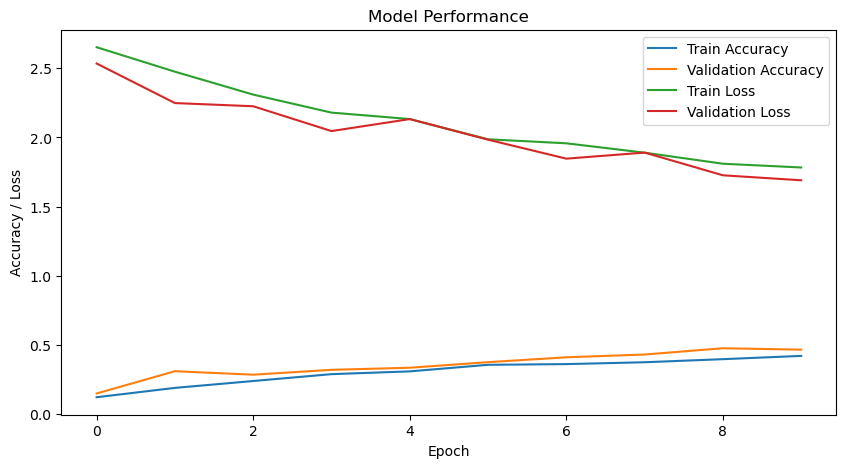

In [38]:
import matplotlib.pyplot as plt

# Avaliação usando o gerador de teste
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print("Test Accuracy:", test_acc)

# Plot da acurácia e perda (loss) no mesmo gráfico
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Performance')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Gerar previsões para o conjunto de teste
test_generator.reset()
pred_indices = np.argmax(model.predict(test_generator, steps=50), axis=1)

# Obter rótulos reais e nomes das classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Nomes das classes

# Métricas de classificação
print(classification_report(true_classes, pred_indices, target_names=class_labels))


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step 
              precision    recall  f1-score   support

        Bear       0.18      0.12      0.14        25
        Bird       0.19      0.11      0.14        28
         Cat       0.25      0.08      0.12        25
         Cow       0.12      0.04      0.06        27
        Deer       0.04      0.08      0.05        26
         Dog       0.09      0.08      0.08        25
     Dolphin       0.09      0.08      0.08        26
    Elephant       0.07      0.11      0.09        27
     Giraffe       0.04      0.04      0.04        26
       Horse       0.05      0.04      0.04        26
    Kangaroo       0.00      0.00      0.00        26
        Lion       0.11      0.15      0.12        27
       Panda       0.08      0.15      0.10        27
       Tiger       0.10      0.15      0.12        26
       Zebra       0.06      0.07      0.06        28

    accuracy                           0.09       395
   macro avg       0.10      0.09      

2024-04-22 22:36:33.616904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


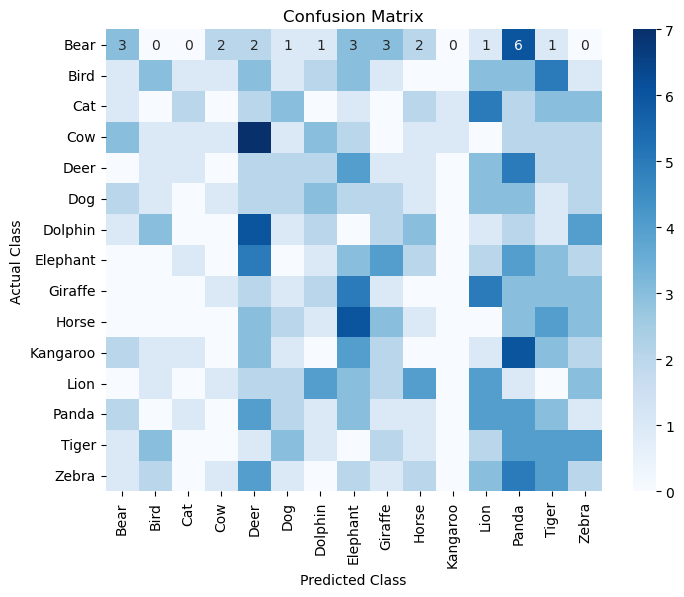

array([[3, 0, 0, 2, 2, 1, 1, 3, 3, 2, 0, 1, 6, 1, 0],
       [1, 3, 1, 1, 3, 1, 2, 3, 1, 0, 0, 3, 3, 5, 1],
       [1, 0, 2, 0, 2, 3, 0, 1, 0, 2, 1, 5, 2, 3, 3],
       [3, 1, 1, 1, 7, 1, 3, 2, 0, 1, 1, 0, 2, 2, 2],
       [0, 1, 1, 0, 2, 2, 2, 4, 1, 1, 0, 3, 5, 2, 2],
       [2, 1, 0, 1, 2, 2, 3, 2, 2, 1, 0, 3, 3, 1, 2],
       [1, 3, 0, 0, 6, 1, 2, 0, 2, 3, 0, 1, 2, 1, 4],
       [0, 0, 1, 0, 5, 0, 1, 3, 4, 2, 0, 2, 4, 3, 2],
       [0, 0, 0, 1, 2, 1, 2, 5, 1, 0, 0, 5, 3, 3, 3],
       [0, 0, 0, 0, 3, 2, 1, 6, 3, 1, 0, 0, 3, 4, 3],
       [2, 1, 1, 0, 3, 1, 0, 4, 2, 0, 0, 1, 6, 3, 2],
       [0, 1, 0, 1, 2, 2, 4, 3, 2, 4, 0, 4, 1, 0, 3],
       [2, 0, 1, 0, 4, 2, 1, 3, 1, 1, 0, 4, 4, 3, 1],
       [1, 3, 0, 0, 1, 3, 1, 0, 2, 1, 0, 2, 4, 4, 4],
       [1, 2, 0, 1, 4, 1, 0, 2, 1, 2, 0, 3, 5, 4, 2]])

In [40]:
# Matriz de confusão
cm = confusion_matrix(true_classes, pred_indices)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
cm

## Exercício de Classificação de Formas Geométricas Usando CNN


### Objetivo Geral
Desenvolver um modelo de Rede Neural Convolucional (CNN) para classificar imagens de formas geométricas baseado no número de lados indicado na imagem. O modelo deverá ser capaz de processar imagens e usar os dados de treinamento para aprender a identificar várias formas geométricas.

### Dados
Os dados para este exercício estão organizados em uma pasta chamada `dados`, subpasta `formas_geometricas`, contendo:
- Uma pasta `imagens` com arquivos de imagens das formas.
- Um arquivo `targets.csv` com duas colunas: `filename` e `sides`, onde `filename` é o nome do arquivo da imagem e `sides` indica o número de lados da forma geométrica na imagem.
### Requisitos Técnicos
- A implementação pode ser feita em Python utilizando bibliotecas como TensorFlow/Keras.
- Devido a limitações de poder computacional, inicialmente, pode-se testar o modelo em um subset de até 4000 imagens.



#### Preparação dos Dados
1. **Leitura dos Dados:**
   - Carregar o arquivo `targets.csv`.
   - Carregar as imagens de acordo com os nomes dos arquivos listados no arquivo CSV.



2. **Preprocessamento:**
   - Normalizar as imagens (dividir os valores dos pixels por 255 para transformar em valores de 0 a 1).
   - Converter os rótulos (`y`) para formato categórico (one-hot encoding) para classificação multiclasse.



3. **Divisão dos Dados:**
   - Dividir os dados em conjuntos de treinamento (70%), validação (15%) e teste (15%).


2024-04-22 22:58:31.113210: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 22:58:31.114021: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 22:58:31.145423: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 22:58:31.281192: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 22:58:31.994913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin


#### Configuração do Modelo
4. **Definição da Rede Convolucional:**
   - Criar uma arquitetura de CNN adequada para o problema, incluindo camadas convolucionais, max pooling, dropout (opcional) e fully connected (dense).


/home/arthur/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



#### Treinamento do Modelo
5. **Treinamento:**
   - Treinar o modelo utilizando os dados de treinamento e validar usando o conjunto de validação.
   - Acompanhar a evolução da loss (perda) e da acurácia tanto no treinamento quanto na validação.


#### Avaliação do Modelo
6. **Exibir de Resultados:**
   - Plotar gráficos mostrando a loss e acurácia durante o treinamento e a validação para visualizar o desempenho do modelo ao longo das épocas.
   - Após o treinamento, usar o conjunto de teste para fazer a avaliação final do modelo e exibir as métricas de classificação (precisão, recall, F1-score).
   - Gerar e exibir a matriz de confusão para ajudar na visualização do desempenho do modelo nas diferentes classes.